In [39]:
import pandas as pd
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv
import seaborn as sns
import matplotlib.pyplot as plt

load_dotenv()

DB_URL = os.getenv("DATABASE_URL")

engine = create_engine(DB_URL)

df = pd.read_sql("SELECT * FROM weather_data", engine)
df.head()


,id,city,timestamp,temperature,humidity,wind_speed,pm10,pm2_5,nitrogen_dioxide,ozone
0,1,Chennai,2025-11-12 18:47:43.629680+00:00,25.4,92.0,3.2,49.1,43.9,2.6,124.0
1,2,Bengaluru,2025-11-12 18:47:43.641602+00:00,19.3,93.0,4.2,45.9,44.7,12.8,75.0
2,3,Kolkata,2025-11-12 18:47:43.645636+00:00,17.4,95.0,3.4,135.5,125.3,21.0,54.0
3,4,Hyderabad,2025-11-12 18:47:43.647382+00:00,18.4,79.0,2.3,49.0,46.8,10.6,96.0
4,5,Mumbai,2025-11-12 18:47:43.654991+00:00,25.4,67.0,9.7,44.4,42.1,18.5,78.0


## "Removing null values"

In [40]:
numeric_cols = ["temperature","humidity","wind_speed","pm10","pm2_5","nitrogen_dioxide","ozone"]

df[numeric_cols] = df.groupby("city")[numeric_cols].transform(
    lambda x: x.interpolate(method="linear", limit_direction="both")
)

In [41]:
df.isnull().sum()

id                  0
city                0
timestamp           0
temperature         0
humidity            0
wind_speed          0
pm10                0
pm2_5               0
nitrogen_dioxide    0
ozone               0
dtype: int64

# "Correlation between weather and AQI"

In [42]:
df_numeric = df.select_dtypes(include=['number'])
df_numeric.corr()

,id,temperature,humidity,wind_speed,pm10,pm2_5,nitrogen_dioxide,ozone
id,1.000000,-0.018028,0.002829,-0.001330,0.020972,0.025281,0.044370,-0.042689
temperature,-0.018028,1.000000,0.391340,0.328148,0.050302,0.069788,-0.257952,0.339242
humidity,0.002829,0.391340,1.000000,-0.024554,0.296960,0.313391,-0.107383,-0.030362
wind_speed,-0.001330,0.328148,-0.024554,1.000000,-0.352567,-0.365810,-0.392505,0.226848
pm10,0.020972,0.050302,0.296960,-0.352567,1.000000,0.994138,0.405800,0.036849
pm2_5,0.025281,0.069788,0.313391,-0.365810,0.994138,1.000000,0.447857,-0.009761
nitrogen_dioxide,0.044370,-0.257952,-0.107383,-0.392505,0.405800,0.447857,1.000000,-0.659190
ozone,-0.042689,0.339242,-0.030362,0.226848,0.036849,-0.009761,-0.659190,1.000000


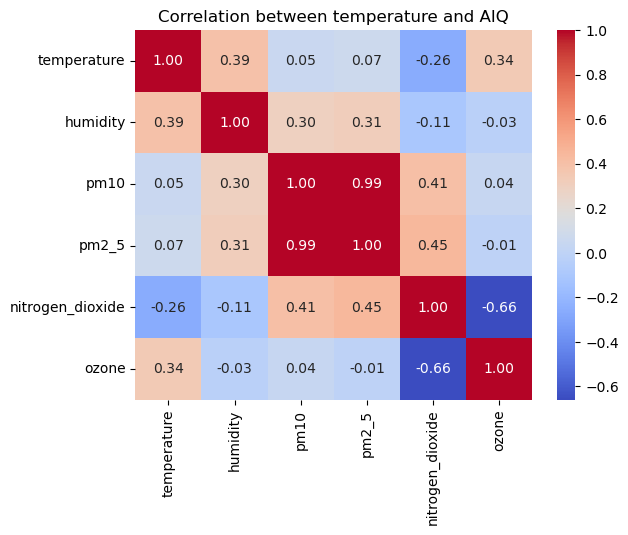

In [43]:
num_columns = ['temperature','humidity','pm10','pm2_5','nitrogen_dioxide','ozone']

sns.heatmap(df[num_columns].corr(), annot=True, cmap='coolwarm',fmt=".2f")
plt.title('Correlation between temperature and AIQ')
plt.show()




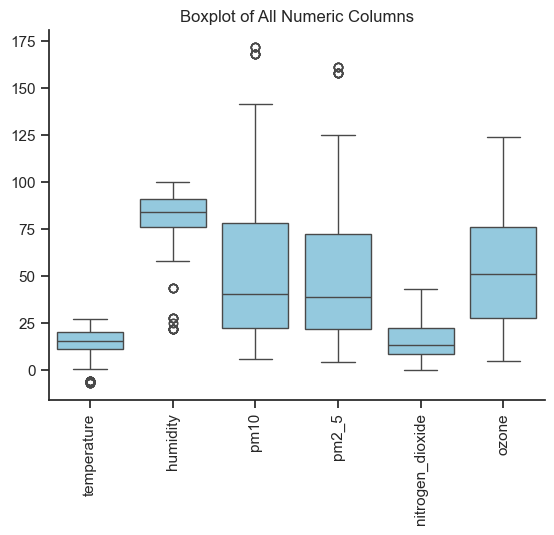

In [51]:
sns.boxplot(data=df[num_columns],color='skyblue')
plt.xticks(rotation=90)
plt.title('Boxplot of All Numeric Columns')
plt.show()